<a href="https://colab.research.google.com/github/CateDiaz/CCE2021/blob/main/Copia_de_TipoProducto(todas)_html.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE BASE DE DATOS VENTAS EL TIEMPO

* cargar librerias

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('content\drive')

KeyboardInterrupt: ignored

# Cargar archivo

In [ ]:
ventas=pd.read_excel("consolidado_ventas_procesoII080921.xlsx")

In [ ]:
ventas.head()

,Anio_Venta,Numero_OrdenID,Posicion,Linea_negocio,Categoria,Anio_Proyecto,ProyectoID,ProductoID,Producto_Completo,Canal_Venta,CanalID,Nombre_Canal_Venta,Oficina_Ventas_Resp,Grupo_Vendedores,Fecha_Pago,Doc_Ref_Factura,No_Documento,Fecha_Transfe_Factura,Código_Orden,Fecha_Salida_Mercancia,Creado_el,Creado_a_las,Creado_por,Via_PagoID,Nombre_Via_Pago,Forma_Pago,SolicitanteID,Nombre_Solicitante,Ced_Nit_Responsable,Nombre_Resp_Pago,Destinatario_mcia,Nombre_Destinatario,Cantidad,Cod_DANE,Ciudad_Entrega,Departamento,Numero_Guia,Estado_Guia,Valor_Bruto_Suscripcion,Dcto_Agencia,Dcto_Cliente,Vr_Neto_sin_IVA,IVA,Vr_Venta_Ticket,Cuotas,Nota_Credito,Doc_finan_nota,Tipo_Producto,Tomo_X_producto,Total_Unidades
0,2017,70000003,10,CO-COLECCIONES,EC-CULTURA,2017,INGLES,ECAI,ECAI INGLES COL T1 AL T30,CALL,0811008963,MULTIENLACE S.A.S.,BOAL,I90,2017-03-01,355814048,4.400031e+09,2017-03-01,2.038647e+09,2017-05-24,2017-03-01,08:35:49,TIEMVENT94,N,N I - Pagos Online,TARJETA DEBITO,0013830399,HERNANDO PÁEZ REY,13830399,HERNANDO PÁEZ REY,13830399,HERNANDO PÁEZ REY,1,11001,11001 BOGOTA BOGOTA,DISTRITO CAPITAL,24620663,Entregado-Indexado,623000,0,-83980,539020,0,539020,0,NaN,NaN,Col completa,30,30
1,2017,70000006,10,CO-COLECCIONES,GH-HOGAR,2017,COCINA EXP,GHAE,GHAE COCINA EXPRESS COL T1 AL T10,CALL,0811008963,MULTIENLACE S.A.S.,BOAL,I90,2017-03-01,355813991,4.400031e+09,2017-03-01,2.038154e+09,2017-03-29,2017-03-01,08:35:13,TIEMVENT79,N,N I - Pagos Online,TARJETA DEBITO,0006745936,JORGE ELIECER BUENO DAZA,6745936,JORGE ELIECER BUENO DAZA,6745936,JORGE ELIECER BUENO DAZA,1,11001,11001 BOGOTA BOGOTA,DISTRITO CAPITAL,24415800,Entregado-Indexado,179000,0,-19994,159006,0,159006,0,NaN,NaN,Col completa,10,10
2,2017,70000007,10,CO-COLECCIONES,EC-CULTURA,2017,INGLES,ECAC,ECAC INGLES COL T1 ALl T30 CODENSA,CALL,0811008963,MULTIENLACE S.A.S.,BOAL,I90,2017-03-01,6900102074,3.100002e+09,2017-03-01,2.038994e+09,2017-07-04,2017-03-01,08:44:00,TIEMVENT109,F,F I - CODENSA,TARJETA CODENSA,0079570437,CODENSA S.A. SFT,830037248S,CODENSA S.A. SFT,79570437,GUILLERMO HERNANDEZ GARCIA,1,11001,11001 BOGOTA BOGOTA,DISTRITO CAPITAL,24706789,Entregado-Indexado,623000,0,-83980,539020,0,539020,3,NaN,NaN,Col completa,30,30
3,2017,70000009,10,CO-COLECCIONES,EC-CULTURA,2017,INGLES,ECAI,ECAI INGLES COL T1 AL T30,CALL,0811008963,MULTIENLACE S.A.S.,BOAL,I90,2017-03-01,355814049,4.400031e+09,2017-03-01,2.038647e+09,2017-05-24,2017-03-01,08:54:49,TIEMVENT85,N,N I - Pagos Online,TARJETA DEBITO,0014210985,VALLEJO GUSTAVO ADOLFO,14210985,VALLEJO GUSTAVO ADOLFO,14210985,VALLEJO GUSTAVO ADOLFO,1,73001,73001 IBAGUE TOLIMA,TOLIMA,24418132,Entregado-Indexado,623000,0,-83980,539020,0,539020,0,NaN,NaN,Col completa,30,30
4,2017,70000011,10,CO-COLECCIONES,GH-HOGAR,2017,COCINA EXP,GHAE,GHAE COCINA EXPRESS COL T1 AL T10,CALL,0811008963,MULTIENLACE S.A.S.,BOAL,I90,2017-03-01,355814140,4.400031e+09,2017-03-01,2.038154e+09,2017-03-29,2017-03-01,09:08:41,TIEMVENT94,N,N I - Pagos Online,TARJETA DEBITO,0019292736,JUAN ROBERTO CONTRERAS JIMENEZ,19292736,JUAN ROBERTO CONTRERAS JIMENEZ,19292736,JUAN ROBERTO CONTRERAS JIMENEZ,1,11001,11001 BOGOTA BOGOTA,DISTRITO CAPITAL,24415762,Entregado-Indexado,179000,0,-19994,159006,0,159006,0,NaN,NaN,Col completa,10,10


In [ ]:
print(ventas.dtypes)

Anio_Venta                          int64
Numero_OrdenID                      int64
Posicion                            int64
Linea_negocio                      object
Categoria                          object
Anio_Proyecto                       int64
ProyectoID                         object
ProductoID                         object
Producto_Completo                  object
Canal_Venta                        object
CanalID                            object
Nombre_Canal_Venta                 object
Oficina_Ventas_Resp                object
Grupo_Vendedores                   object
Fecha_Pago                 datetime64[ns]
Doc_Ref_Factura                     int64
No_Documento                      float64
Fecha_Transfe_Factura      datetime64[ns]
Código_Orden                      float64
Fecha_Salida_Mercancia     datetime64[ns]
Creado_el                  datetime64[ns]
Creado_a_las                       object
Creado_por                         object
Via_PagoID                        

In [ ]:
ventas["Linea_negocio"]=ventas["Linea_negocio"].astype("category")
ventas["Categoria"]=ventas["Categoria"].astype("category")
ventas["ProyectoID"]=ventas["ProyectoID"].astype("category")
ventas["ProductoID"]=ventas["ProductoID"].astype("category")
ventas["Nombre_Canal_Venta"]=ventas["Nombre_Canal_Venta"].astype("category")
ventas["Forma_Pago"]=ventas["Forma_Pago"].astype("category")
ventas["Ciudad_Entrega"]=ventas["Ciudad_Entrega"].astype("category")
#ventas["Departamento"]=ventas["Departamento"].astype("category")

Eliminación de columnas innecesarias

In [ ]:
ventas_mod = ventas

In [ ]:
#ELIMINAR COLUMNAS
ventas_mod.drop(["CanalID","Grupo_Vendedores", "Linea_negocio", "No_Documento", "Creado_a_las","Creado_por", "Via_PagoID", "Numero_Guia",
                 "Estado_Guia", "Nota_Credito","Doc_finan_nota", "ProyectoID"], axis= 1, inplace=True)

# Identificar datos faltantes

* Reemplazar valores

In [ ]:
ventas_mod.replace(" ", np.nan, inplace = True)

In [ ]:
#"True" significa valor perdido, mientras que "False" significa valor no perdido.
datos_faltantes = ventas_mod.isnull()
datos_faltantes.head()

,Anio_Venta,Numero_OrdenID,Posicion,Categoria,Anio_Proyecto,ProductoID,Producto_Completo,Canal_Venta,Nombre_Canal_Venta,Oficina_Ventas_Resp,Fecha_Pago,Doc_Ref_Factura,Fecha_Transfe_Factura,Código_Orden,Fecha_Salida_Mercancia,Creado_el,Nombre_Via_Pago,Forma_Pago,SolicitanteID,Nombre_Solicitante,Ced_Nit_Responsable,Nombre_Resp_Pago,Destinatario_mcia,Nombre_Destinatario,Cantidad,Cod_DANE,Ciudad_Entrega,Departamento,Valor_Bruto_Suscripcion,Dcto_Agencia,Dcto_Cliente,Vr_Neto_sin_IVA,IVA,Vr_Venta_Ticket,Cuotas,Tipo_Producto,Tomo_X_producto,Total_Unidades
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


* Conteo de nulos por columna

In [ ]:
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print (datos_faltantes[column].value_counts())
    print("")  

Anio_Venta
False    107879
Name: Anio_Venta, dtype: int64

Numero_OrdenID
False    107879
Name: Numero_OrdenID, dtype: int64

Posicion
False    107879
Name: Posicion, dtype: int64

Categoria
False    107879
Name: Categoria, dtype: int64

Anio_Proyecto
False    107879
Name: Anio_Proyecto, dtype: int64

ProductoID
False    107879
Name: ProductoID, dtype: int64

Producto_Completo
False    107879
Name: Producto_Completo, dtype: int64

Canal_Venta
False    107879
Name: Canal_Venta, dtype: int64

Nombre_Canal_Venta
False    107879
Name: Nombre_Canal_Venta, dtype: int64

Oficina_Ventas_Resp
False    107879
Name: Oficina_Ventas_Resp, dtype: int64

Fecha_Pago
False    106768
True       1111
Name: Fecha_Pago, dtype: int64

Doc_Ref_Factura
False    107879
Name: Doc_Ref_Factura, dtype: int64

Fecha_Transfe_Factura
False    107879
Name: Fecha_Transfe_Factura, dtype: int64

Código_Orden
False    105890
True       1989
Name: Código_Orden, dtype: int64

Fecha_Salida_Mercancia
False    105890
True     

##Codificar los datos

In [ ]:
ventas_nums = {'Departamento': {'ATLANTICO': 8, 'ANTIOQUIA': 5, 'DISTRITO CAPITAL': 11, 'BOLIVAR': 13, 'BOYACA': 15, 'CALDAS': 17, 'CAQUETA': 18, 
                 'CAUCA': 19, 'CESAR': 20, 'CORDOBA': 23, 'CUNDINAMARCA': 25, 'CHOCO': 27, 'HUILA': 41, 'GUAJIRA': 44, 'MAGDALENA': 47,
                 'META': 50, 'NARINO': 52, 'NORTE SANTANDER': 54, 'QUINDIO': 63, 'RISARALDA': 66, 'SANTANDER': 68, 'SUCRE': 70, 'TOLIMA': 73, 
                 'VALLE': 76, 'ARAUCA': 81, 'CASANARE': 85, 'PUTUMAYO': 86, 'SAN ANDRES': 88, 'AMAZONAS': 91, 'GUANIA': 94, 'GUAVIARE': 95, 
                 'VAUPES': 97, 'VICHADA': 99 }, 
                            
                 'Categoria': {'ER-ENTRETENIMIENTO': 1, 'GH-HOGAR': 2, 'JV-JUVENIL': 3, 'EC-CULTURA': 4, 'VT-MOTOR': 5, 'IF-INFANTIL': 6,
                                'OD-MODA': 7, 'MN-MANUALIDADES': 8},

                 'Forma_Pago': {'TARJETA DEBITO': 1, 'TARJETA CREDITO': 2, 'EFECTIVO - CONSIGNACIONES': 3, 'TARJETA CODENSA': 4, 'CREDITOS': 5},
               
               'Canal_Venta':{'CALL': 1, 'INTERNET': 2, 'CVS': 3, 'CONCESIONARIO': 4, 'CATÁLOGO': 5, 'VOP': 6, 'LIBRANZA': 7, 'EMPLEADOS': 8,
                              'FERIAS':9, 'ALTERNATIVOS': 10},
               
               'Oficina_Ventas_Resp':{'BOAL': 1, 'BOCV': 2, 'SOCA': 3, 'COBA': 4, 'ANME': 5, 'TOIB': 6, 'ECEC': 7, 'BYTU': 8, 'ORSA': 9, 'CECE': 10,
                                      'BOCE': 11, 'LLVI': 12, 'BOSU': 12},
               
               'Nombre_Via_Pago': {'N I - Pagos Online': 1, '8 I - Tarjeta Crédit': 2, 'H I - PSE Internet T': 3, 'T P - EFECTY': 4, 'F I - CODENSA': 5,
                                   '1 I - EFECTIVO': 6, 'B I - TARJETA CREDIT': 7, '4 I - CONSIGNACIONES': 8, 'D I - TARJETA DEBITO': 9, 'O I - CREDITO': 10, 
                                   'P I - LIBRANZAS': 11, '7 I - TARJETA CR. NO': 12, '3 I - CHEQUES': 13}, 
               
               'Tipo_Producto': {'Col completa': 1, 'Unidades': 2, 'Paquete': 3}
               }               

In [ ]:
ventas_mod.replace(ventas_nums, inplace = True)

In [ ]:
df_tiempo = ventas_mod

df_tiempo.drop(['ProductoID', 'Producto_Completo', 'Nombre_Canal_Venta', 'Nombre_Solicitante', 'Nombre_Resp_Pago', 'Nombre_Destinatario',
                'Ciudad_Entrega', 'Fecha_Pago','Fecha_Transfe_Factura', 'Fecha_Salida_Mercancia', 'Creado_el', 'SolicitanteID', 'Ced_Nit_Responsable', 
                'Destinatario_mcia', 'Código_Orden', 'Numero_OrdenID','Posicion', 'Categoria','Canal_Venta','Doc_Ref_Factura',
                 'Oficina_Ventas_Resp', 'Nombre_Via_Pago', 'Cod_DANE', 'Departamento', 'Valor_Bruto_Suscripcion', 'Dcto_Agencia',
                  'Dcto_Cliente',"Tipo_Producto", "Tomo_X_producto", "Total_Unidades"], axis= 1, inplace=True)

In [ ]:
#Creación de base de datos únicamente con las variables a utilizar

df_tiempo[["Anio_Venta","Anio_Proyecto", "Forma_Pago", "Cantidad", "Vr_Neto_sin_IVA", "IVA", "Cuotas"]]

,Anio_Venta,Anio_Proyecto,Forma_Pago,Cantidad,Vr_Neto_sin_IVA,IVA,Cuotas
0,2017,2017,1,1,539020,0,0
1,2017,2017,1,1,159006,0,0
2,2017,2017,4,1,539020,0,3
3,2017,2017,1,1,539020,0,0
4,2017,2017,1,1,159006,0,0
...,...,...,...,...,...,...,...
107874,2021,2021,2,1,698993,0,0
107875,2021,2021,2,1,65800,0,0
107876,2021,2021,1,1,214899,0,0
107877,2021,2021,1,1,214899,0,0


In [ ]:
df_tiempo.head()

,Anio_Venta,Anio_Proyecto,Forma_Pago,Cantidad,Vr_Neto_sin_IVA,IVA,Vr_Venta_Ticket,Cuotas
0,2017,2017,1,1,539020,0,539020,0
1,2017,2017,1,1,159006,0,159006,0
2,2017,2017,4,1,539020,0,539020,3
3,2017,2017,1,1,539020,0,539020,0
4,2017,2017,1,1,159006,0,159006,0


In [ ]:
df_tiempo.dtypes

Anio_Venta         int64
Anio_Proyecto      int64
Forma_Pago         int64
Cantidad           int64
Vr_Neto_sin_IVA    int64
IVA                int64
Vr_Venta_Ticket    int64
Cuotas             int64
dtype: object

In [ ]:
#todos
df_tiempo

,Anio_Venta,Anio_Proyecto,Forma_Pago,Cantidad,Vr_Neto_sin_IVA,IVA,Vr_Venta_Ticket,Cuotas
0,2017,2017,1,1,539020,0,539020,0
1,2017,2017,1,1,159006,0,159006,0
2,2017,2017,4,1,539020,0,539020,3
3,2017,2017,1,1,539020,0,539020,0
4,2017,2017,1,1,159006,0,159006,0
...,...,...,...,...,...,...,...,...
107874,2021,2021,2,1,698993,0,698993,0
107875,2021,2021,2,1,65800,0,65800,0
107876,2021,2021,1,1,214899,0,214899,0
107877,2021,2021,1,1,214899,0,214899,0


## Regularización Ridge, Lasso y Elastic Net###

---



---



###Todos los tipos de producto

###Lasso ###

---



In [ ]:
#Librerías

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_blobs

In [ ]:
#Matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_tiempo.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
52,Vr_Venta_Ticket,Vr_Neto_sin_IVA,0.998852,0.998852
38,Vr_Neto_sin_IVA,Vr_Venta_Ticket,0.998852,0.998852
1,Anio_Venta,Anio_Proyecto,0.951442,0.951442
8,Anio_Proyecto,Anio_Venta,0.951442,0.951442
23,Forma_Pago,Cuotas,0.483616,0.483616


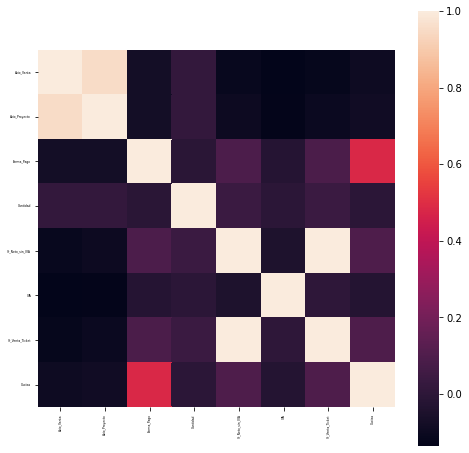

In [ ]:
# Heatmap 
# Matriz de Correlaciones


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

In [ ]:
X = df_tiempo.drop(columns = "Vr_Venta_Ticket")
y = df_tiempo['Vr_Venta_Ticket'].values

matriztodas = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.70,
                                                    random_state = 1234,
                                                    shuffle = True )

###Ridge## 

---



#Todos los tipos de producto

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelotodas = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

matriztodas = modelotodas.fit(X = X_train, y = y_train)

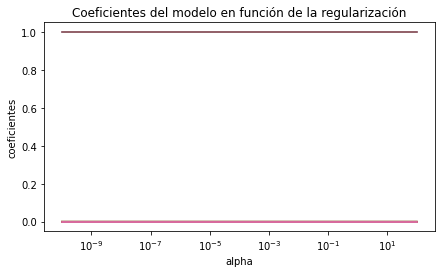

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelotodas.alphas
coefs = []

for alpha in alphas:
    modelotodas_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelotodas_temp.fit(X_train, y_train)
    coefs.append(modelotodas_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

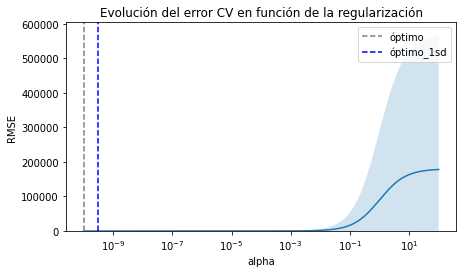

In [ ]:
# Aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce.
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelotodas.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelotodas.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelotodas.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelotodas.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelotodas.alphas, rmse_cv)
ax.fill_between(
    modelotodas.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado todos los tipos de productos: {modelotodas.alpha_}")

Mejor valor de alpha encontrado todos los tipos de productos: 1e-10


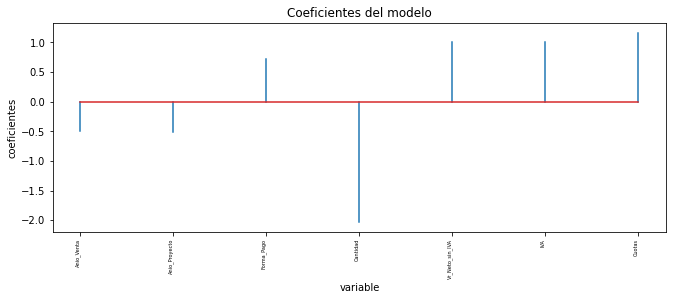

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelotodas.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelotodas.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([158999.78902798, 159001.06603669, 159000.51204158,  69898.06444177,
       189000.3970312 , 398999.45563722, 342902.62524634, 253999.12224669,
        39897.44899961, 199000.58985762])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 2.9670045587614133


###Lasso###

---



###Todas los tipos de productos

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelotodas = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
matriztodas = modelotodas.fit(X = X_train, y = y_train)

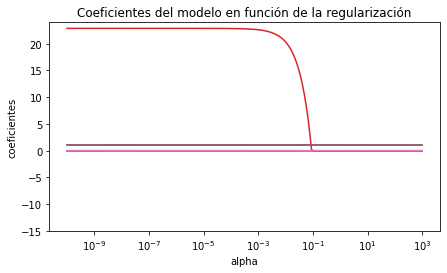

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelotodas.alphas_
coefs = []

for alpha in alphas:
    modelotodas_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelotodas_temp.fit(X_train, y_train)
    coefs.append(modelotodas_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

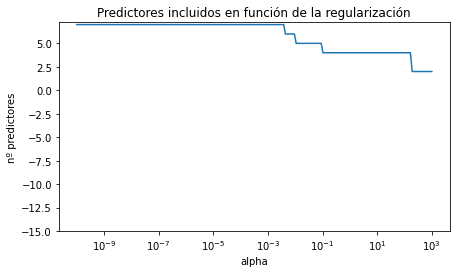

In [ ]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelotodas.alphas_
n_predictores = []

for alpha in alphas:
    modelotodas_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelotodas_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelotodas_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

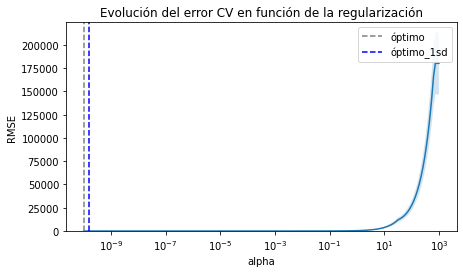

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelotodas.mse_path_.mean(axis=1)
mse_sd = modelotodas.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelotodas.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelotodas.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelotodas.alphas_, rmse_cv)
ax.fill_between(
    modelotodas.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelotodas.alpha_}")

Mejor valor de alpha encontrado: 1e-10


Mejor valor de alpha encontrado: 1e-10


In [ ]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelotodas.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelotodas.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [1.57029012e-10]


Mejor valor de alpha encontrado + 1 desviación estándar: [1.57029012e-10]
]

In [ ]:
#Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada.

# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelotodas = Lasso(alpha=optimo_1sd, normalize=True)
modelotodas.fit(X_train, y_train)

Lasso(alpha=array([1.57029012e-10]), normalize=True)

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelotodas.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Anio_Venta,-125.426570
1,Anio_Proyecto,123.840308
2,Forma_Pago,0.907647
3,Cantidad,-1.839553
4,Vr_Neto_sin_IVA,0.999980
5,IVA,0.999716
6,Cuotas,-4.361836


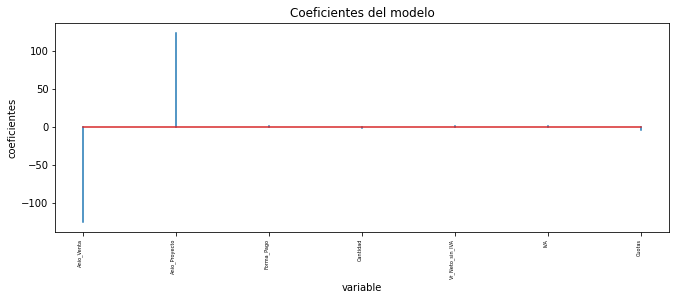

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelotodas.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([159024.47426069, 159025.56657412, 159025.38190809,  69924.13885448,
       189023.39283631, 399015.015667  , 342796.53877639, 254020.1200107 ,
        39924.04771618, 199020.52821502])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 50.86350139581305


##Regressión Elastic Net####

---



###Todos los productos

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
1399,0.99,1.000000e-10,6.076988e-04,0.024652
1398,0.99,1.162322e-10,7.613277e-04,0.027592
1397,0.99,1.350994e-10,9.557398e-04,0.030915
1396,0.99,1.570290e-10,1.202362e-03,0.034675
1395,0.99,1.825183e-10,1.516001e-03,0.038936
...,...,...,...,...
801,0.90,8.603464e+02,3.240957e+10,180026.579217
1200,0.99,1.000000e+03,3.240957e+10,180026.579217
1201,0.99,8.603464e+02,3.240957e+10,180026.579217
1202,0.99,7.401960e+02,3.240957e+10,180026.579217


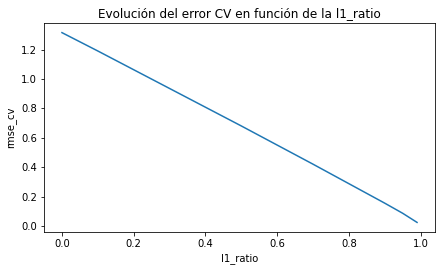

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 1e-10
Mejor valor de l1_ratio encontrado: 0.99


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

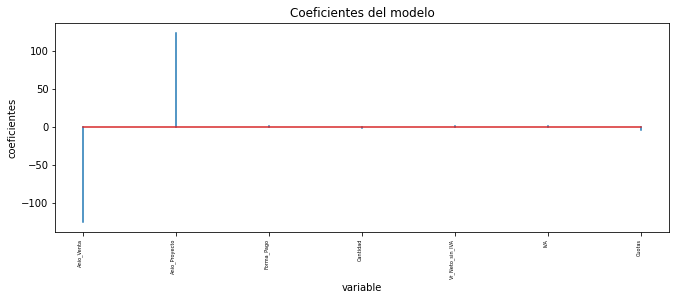

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 50.864330003645115


Las predicciones del modelo final se alejan en promedio 4232.750 unidades del valor real, utilizando solo XX de los XXX predictores disponibles.

###Comparación de modelos

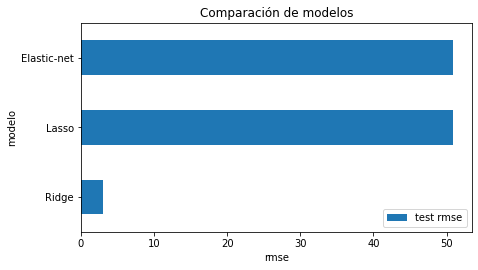

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [ rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
df_comparacion

,modelo,test rmse
0,Ridge,2.967005
1,Lasso,50.863501
2,Elastic-net,50.864330
